# Wine Fraud 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('wine_fraud.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

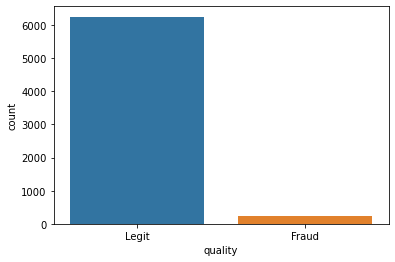

In [6]:
sns.countplot(x='quality',data=df)

In [7]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

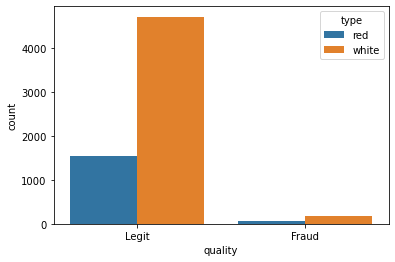

In [10]:
sns.countplot(x='quality',data=df,hue='type')

In [18]:
reds = df[df['type']=='red']

In [12]:
white = df[df['type']=='white']

In [19]:
# percentage of fraud red wine 
100*len(reds[reds['quality']=='Fraud'])/len(reds)

3.9399624765478425

In [21]:
# percentage of fraud white wine 
100*len(white[white['quality']=='Fraud'])/len(white)                                            

3.736218864842793

In [22]:
# correlation between various feature and other features 

df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

<AxesSubplot:>

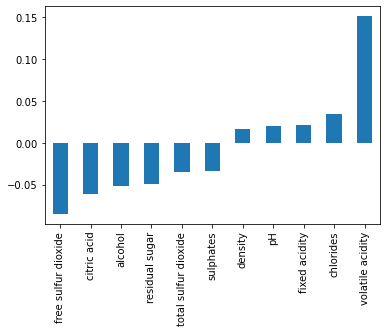

In [31]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

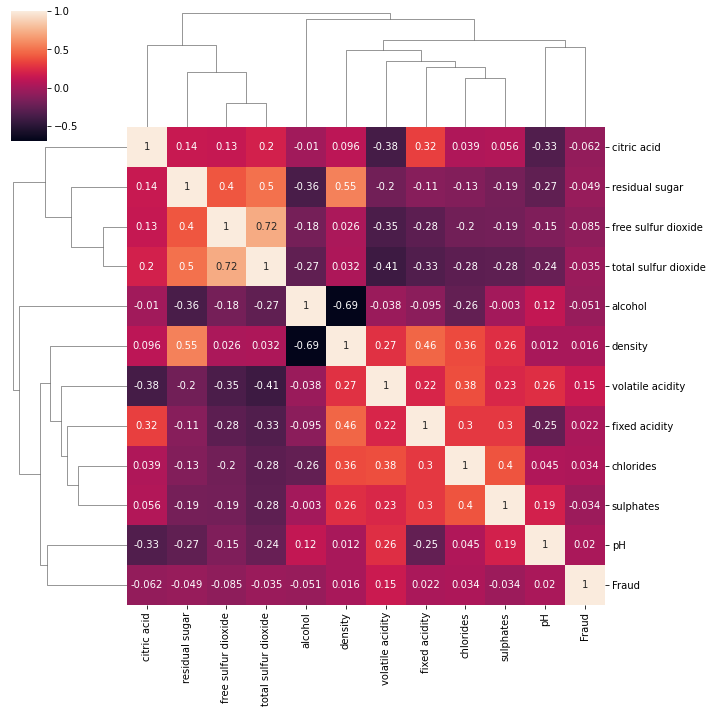

In [33]:
sns.clustermap(df.corr(),annot=True)

In [37]:
# df = df.drop('Fraud',axis=1)

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [38]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [41]:
X = df.drop('quality',axis=1)

In [42]:
y = df['quality']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
scaled_X_train = scaler.fit_transform(X_train)

In [49]:
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.svm import SVC

In [54]:
svc = SVC(class_weight='balanced')

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1]}

In [59]:
grid=GridSearchCV(svc,param_grid)

In [60]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [62]:
grid.best_params_

{'C': 1}

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
grids_pred = grid.predict(scaled_X_test)

In [68]:
confusion_matrix(y_test,grids_pred)

array([[ 17,  10],
       [ 92, 531]])

classification reports

In [73]:
print(classification_report(y_test,grids_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

